In [4]:
import yfinance as yf

#define the ticker symbol
tickerSymbol = 'MSFT'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2020-1-1', end='2021-7-18')

#see your data
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,156.393425,158.314112,155.950192,158.205765,22622100,0.0,0
2020-01-03,155.940346,157.545836,155.684244,156.235825,21116200,0.0,0
2020-01-06,154.719007,156.708649,154.157567,156.639694,20813700,0.0,0
2020-01-07,156.925308,157.270038,154.955370,155.211456,21634100,0.0,0
2020-01-08,156.541163,158.383066,155.575897,157.683731,27746500,0.0,0
...,...,...,...,...,...,...,...
2021-07-12,279.160004,279.769989,276.579987,277.320007,18931700,0.0,0
2021-07-13,277.519989,282.850006,277.390015,280.980011,26120100,0.0,0
2021-07-14,282.350006,283.660004,280.549988,282.510010,23113700,0.0,0


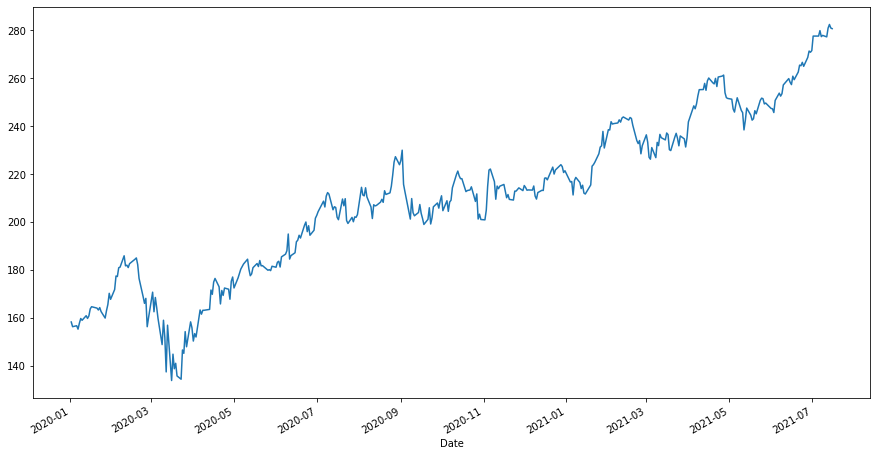

In [7]:
from matplotlib import pyplot as plt
plt.figure(figsize=[15,8])
tickerDf.Close.plot()
plt.show()

In [8]:
#define the ticker symbol
tickerSymbol = 'MSFT'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get event data for ticker
tickerData.calendar

,Value
Earnings Date,2021-07-27 00:00:00
Earnings Average,1.9
Earnings Low,1.64
Earnings High,2.03
Revenue Average,44102900000
Revenue Low,40850000000
Revenue High,44914700000


In [10]:
tickerData.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 163000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, organizations, and enterprise divisions. Its Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solu

In [14]:
recommendations=tickerData.recommendations
recommendations['date']=recommendations.index.date

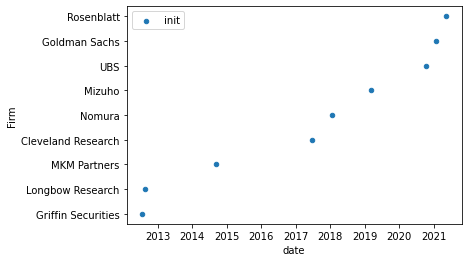

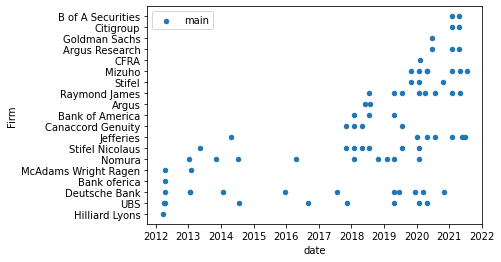

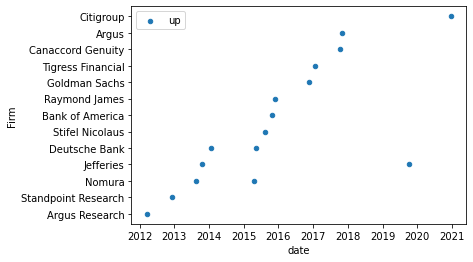

In [34]:
recs=recommendations.groupby(['date', 'Action'])['Firm'].count().reset_index()#.plot()
import pandas as pd
recs.index=pd.DatetimeIndex(recs['date'])
#recommendations=recommendations[recommendations['To Grade'].str.contains('Buy')]
recs_=recommendations.groupby('Action')
for key, group in recs_:
    group.plot.scatter('date', 'Firm', label=key, )
    #print(group)

#recommendations.groupby(['date', 'To Grade'])['Firm'].count().plot()



In [35]:
recommendations.Action.unique()

array(['up', 'main', 'init'], dtype=object)

In [13]:
tickerData.recommendations.groupby(['To Grade']).count()

,Firm,From Grade,Action
To Grade,,,
,1,1,1
Buy,97,97,97
Equal-Weight,6,6,6
Hold,14,14,14
Long-Term Buy,1,1,1
Market Perform,10,10,10
Neutral,37,37,37
Outperform,66,66,66
Overweight,70,70,70


In [52]:
#assign Ticker to Python object named tsla
tsla = yf.Ticker('tsla')
 
#populate yfinance output with maximum periods for tsla
#among the history options are: period, start, end, interval,
#prepost, and actions
 
#you can also configure the width and rows returned
#for example, these settings return all columns
#and up to 20000 rows
 
#three different history examples
tsla_history = tsla.history(period="max")
tsla_history = tsla.history(start="2021-02-01", end="2021-02-28",interval="30m", actions = False)
#tsla_history = tsla.history(start="2021-2-1", end="2021-2-28",interval="30m",prepost = True, actions = False)
 
pd.options.display.width = 0
pd.set_option("display.max_rows",20000)
 
print (tsla_history)

- TSLA: 15m data not available for startTime=1612166400 and endTime=1614499200. The requested range must be within the last 60 days.
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


In [54]:
tsla.actions

,Dividends,Stock Splits
Date,,
2020-08-31,0.0,5.0


In [63]:
## Get bitcoin prices
cmc=requests.get('https://coinmarketcap.com/')
soup=BeautifulSoup(cmc.content, 'html.parser')
type(soup.prettify())

str

In [68]:
import json

data=soup.find('script', id="__NEXT_DATA__", type="application/json")
coins={}
coins_data=json.loads(data.contents[0])
coins_data
listing=coins_data['props']['initialState']['cryptocurrency']['listingLatest']['data']
for i in listing:
    coins[str(i['id'])]=i['slug']
coins

{'1': 'bitcoin',
 '1027': 'ethereum',
 '825': 'tether',
 '1839': 'binance-coin',
 '2010': 'cardano',
 '3408': 'usd-coin',
 '52': 'xrp',
 '74': 'dogecoin',
 '4687': 'binance-usd',
 '6636': 'polkadot-new',
 '7083': 'uniswap',
 '1831': 'bitcoin-cash',
 '2': 'litecoin',
 '5426': 'solana',
 '1975': 'chainlink',
 '3717': 'wrapped-bitcoin',
 '4943': 'multi-collateral-dai',
 '1321': 'ethereum-classic',
 '512': 'stellar',
 '3890': 'polygon',
 '8916': 'internet-computer',
 '2280': 'filecoin',
 '2416': 'theta',
 '3077': 'vechain',
 '1958': 'tron',
 '328': 'monero',
 '1765': 'eos',
 '7278': 'aave',
 '3957': 'unus-sed-leo',
 '3635': 'crypto-com-coin',
 '4172': 'terra-luna',
 '5994': 'shiba-inu',
 '4195': 'ftx-token',
 '7186': 'pancakeswap',
 '4030': 'algorand',
 '4023': 'bitcoin-bep2',
 '4256': 'klaytn',
 '1518': 'maker',
 '3602': 'bitcoin-sv',
 '3794': 'cosmos',
 '7129': 'terrausd',
 '2011': 'tezos',
 '1376': 'neo',
 '5692': 'compound',
 '5805': 'avalanche',
 '6945': 'amp',
 '1720': 'iota',
 '4642

In [75]:
for i in coins:
    page=requests.get(f'https://coinmarketcap.com/currencies/{coins[i]}/historical-data/?start=20200101&end=20210601')
    soup=BeautifulSoup(page.content, 'html.parser')
    data=soup.find('script', id="__NEXT_DATA__", type="application/json")
    historical_data=json.loads(data.contents[0])
    exit

AttributeError: 'NoneType' object has no attribute 'contents'

In [91]:
#page=requests.get(f'https://coinmarketcap.com/currencies/{coins[i]}/historical-data/?start=20200101&end=20210601')
#soup=BeautifulSoup(page.content, 'html.parser')
#soup

import lxml.html
import requests
from typing import Dict, List


def coinmarketcap_get_btc(start_date: str, end_date: str) -> List[Dict]:
    # Build the url
    url = f'https://coinmarketcap.com/currencies/bitcoin/historical-data/?start={start_date}&end={end_date}'
    print(url)
    # Make the request and parse the tree
    response = requests.get(url, timeout=5)
    tree = lxml.html.fromstring(response.text)
    print(tree)
    # Extract table and raw data
    table = tree.find_class('cmc-table')[0]
    xpath_0, xpath_1 = 'div[3]/div/table/thead/tr', 'div[3]/div/table/tbody/tr/td[%d]/div'
    cols = [_.text_content() for _ in table.xpath(xpath_0 + '/th')]
    dates = (_.text_content() for _ in table.xpath(xpath_1 % 1))
    m = map(lambda d: (float(_.text_content().replace(',', '')) for _ in table.xpath(xpath_1 % d)),
            range(2, 8))
    return [{k: v for k, v in zip(cols, _)} for _ in zip(dates, *m)]

coinmarketcap_get_btc('20210601', '20210701')

https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20210601&end=20210701
<Element html at 0x7ff5110fb410>


IndexError: list index out of range

In [86]:
html


'https://coinmarketcap.com/currencies/ethereum/historical-data/'

In [93]:
url = "https://coinmarketcap.com/currencies/ripple/historical-data/?start=20130428&end=20180802"
content = requests.get(url).content
soup = BeautifulSoup(content,'html.parser')
table = soup.find('table', {'class': 'table'})
table


In [96]:
#soup


In [ ]:
listing=coins_data['props']['initialState']['cryptocurrency']['listingLatest']['data']

In [55]:
#Create a function to get the price of a cryptocurrency
def get_crypto_price(coin):
#Get the URL
    url = "https://www.google.com/search?q="+coin+"+price"
    
    #Make a request to the website
    HTML = requests.get(url) 
  
    #Parse the HTML
    soup = BeautifulSoup(HTML.text, 'html.parser') 
  
    #Find the current price 
    #text = soup.find("div", attrs={'class':'BNeawe iBp4i AP7Wnd'}).text
    text = soup.find("div", attrs={'class':'BNeawe iBp4i AP7Wnd'}).find("div", attrs={'class':'BNeawe iBp4i AP7Wnd'}).text
#Return the text 
    return text
get_crypto_price('btc')

'30,325.40 United States Dollar'

In [ ]:
##Create a main function to consistently show the price of the cryptocurrency
#def main():
#  #Set the last price to negative one
#  last_price = -1
#  #Create an infinite loop to continuously show the price
#  while True:
#    #Choose the cryptocurrency that you want to get the price of (e.g. bitcoin, litecoin)
#    crypto = 'bitcoin' 
#    #Get the price of the crypto currency
#    price = get_crypto_price(crypto)
#    #Check if the price changed
#    if price != last_price:
#      print(crypto+' price: ',price) #Print the price
#      last_price = price #Update the last price
#    time.sleep(3) #Suspend execution for 3 seconds.

In [108]:
## Use LUNA to get data
import urllib.request
api_key='9wg27ze73mwope7e8p97c'
url=f'https://api.lunarcrush.com/v2?data=assets&key={api_key}&symbol=BTC&interval=day&data_points=365'
response=urllib.request.urlopen(url).read()
json_data=json.loads(response)

In [112]:
json_data['config'].items()

dict_items([('data', 'assets'), ('data_points', 365), ('interval', 'day'), ('symbol', "'BTC'")])

In [113]:
#json.loads(urllib.request.urlopen(url).read())
json_data.items()

dict_items([('config', {'data': 'assets', 'data_points': 365, 'interval': 'day', 'symbol': "'BTC'"}), ('usage', {'day': 2, 'month': 7}), ('data', [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'price': 31738.95384732, 'price_btc': 1, 'market_cap': 595510437166, 'percent_change_24h': 6.42, 'percent_change_7d': -3.37, 'percent_change_30d': 0.03, 'volume_24h': 29760541427.05, 'max_supply': '21000000', 'timeSeries': [{'asset_id': 1, 'time': 1595376000, 'open': 9836.651465, 'close': 9623.199383, 'high': 9836.651465, 'low': 9623.199383, 'volume': 17788420468, 'market_cap': 172897234349, 'url_shares': 27224, 'unique_url_shares': 17014, 'reddit_posts': 918, 'reddit_posts_score': 4181, 'reddit_comments': 1219, 'reddit_comments_score': 3777, 'tweets': 87161, 'tweet_spam': 30228, 'tweet_followers': 375763874, 'tweet_quotes': 2225, 'tweet_retweets': 24099, 'tweet_replies': 10367, 'tweet_favorites': 79066, 'tweet_sentiment1': 2298, 'tweet_sentiment2': 8430, 'tweet_sentiment3': 9242, 'tweet_sentimen

In [99]:
S=urllib.request.urlopen(url).read()

In [102]:
tree=lxml.html.fromstring(S)
type(tree)

lxml.html.HtmlElement

In [104]:
lxml.html.document_fromstring(S)

<Element html at 0x7ff52bdb2b30>